# Introduction

In most team sports, the home or hosting team is considered to have a significant advantage over the visitors. Due to this, many important games in many sports have special rules for determining what match is played where. 

The Italian Soccer League (Serie A) is well know around the world as it presents a considerable number of good quality teams such as Juventus, Inter , Roma and Milan.

20 teams made part of the league of the season 2018/2019. Each team played 38 games each. (19 Home / 19 Away)

Do you believe that home teams have advantages over away teams? 

Let's do a simple exercise comparing the number of attempts to score and statistically find it out.

### Dataset

We are going to check if home teams are more likely to try to score (number of shots) compared to Away teams.

For that we are going to use the dataset from the Italian League (Season 2018/2019 - Serie A)

##### Season 2018/2019 - Serie A

(FT & HT results; match stats; match, total goals & AH odds)



In [1]:
# importing usefull packages
import numpy as np
import random

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot']) #graphs style

import math 
from scipy import stats

In [2]:
#importing dataframe
df = pd.read_csv(r'C:\Users\Marcello\Desktop\Projects\20190713_Inferential_Statistic\Final_Project\I1.csv')
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,I1,18/08/2018,Chievo,Juventus,2,3,A,1,1,D,...,2.13,19,2.00,1.68,1.64,2.38,2.29,18.84,6.42,1.22
1,I1,18/08/2018,Lazio,Napoli,1,2,A,1,1,D,...,2.17,20,0.00,2.12,2.07,1.83,1.79,2.78,3.57,2.59
2,I1,19/08/2018,Bologna,Spal,0,1,A,0,0,D,...,1.58,19,-0.25,1.97,1.92,1.99,1.94,2.31,3.18,3.59
3,I1,19/08/2018,Empoli,Cagliari,2,0,H,1,0,H,...,1.71,19,-0.25,1.98,1.91,1.98,1.94,2.54,3.42,2.95
4,I1,19/08/2018,Parma,Udinese,2,2,D,1,0,H,...,1.65,20,0.00,1.81,1.77,2.18,2.10,2.80,3.24,2.78


In [3]:
#finding how many teams played on the league
df["HomeTeam"].nunique()

20

In [4]:
# verifying atributes for each match
print(df.columns)

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD',
       'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA',
       'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh',
       'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')


### Extracting target values for Inferential analysis:

HS = Home Team Shots
AS = Away Team Shots

In [5]:
print(df.shape)
df = df[['HS','AS']]
df.head()

(380, 61)


,HS,AS
0,7,23
1,9,11
2,8,10
3,9,12
4,9,16



# Research Question & Hypothesis


### Assumptions
- The more that the team shots towards the goal they are more likely to score. Therefore they are more likely to win a match
- Home Teams are more likely to shot more. 

### Hypothesis
Home teams are more likely to attempt to score than Away teams?

$H_0 :$ Home teams have the same number of attempts as Away teams

$H_0 = 0 $

$H_A :$ Home teams have more attempts than Away teams

$H_0 \ne 0 $

In [6]:
df = df.sample(frac=0.8, replace=True, random_state=1)
df.describe()

,HS,AS
count,304.000000,304.000000
mean,11.256579,8.861842
std,3.870847,4.070419
min,1.000000,2.000000
25%,9.000000,6.000000
50%,11.000000,9.000000
75%,14.000000,11.000000
max,25.000000,22.000000


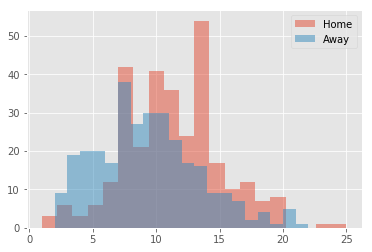

In [7]:
plt.hist(df['HS'], bins=20, alpha=0.5, label='Home')
plt.hist(df['AS'], bins=20, alpha=0.5, label='Away')
plt.legend(loc='upper right')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


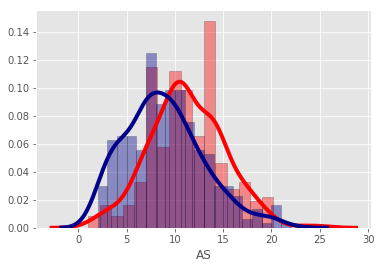

In [8]:
sns.distplot(df['HS'], hist=True, kde=True, 
             bins=20, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(df['AS'], hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

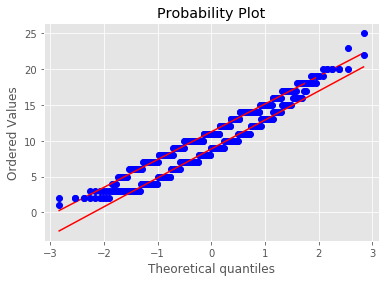

In [9]:
stats.probplot(df['HS'], dist='norm',plot=plt)
stats.probplot(df['AS'], dist='norm',plot=plt)
plt.show()

In [10]:
import thinkstats2
import thinkplot

In [11]:
cdf_1 = thinkstats2.Cdf(df['HS'], label='Home Shots')
cdf_2 = thinkstats2.Cdf(df['AS'], label='Away Shots')

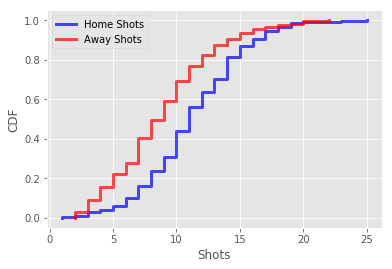

<Figure size 576x432 with 0 Axes>

In [12]:
thinkplot.Cdf(cdf_1 , color='blue')
thinkplot.Cdf(cdf_2 , color='red')
thinkplot.Config(xlabel='Shots', ylabel='CDF', loc='upper left')
thinkplot.show()

# Experimental Design

### T-Test Assumptions
- The first assumption made regarding t-tests concerns the scale of measurement. The assumption for a t-test is that the scale of measurement applied to the data collected follows a continuous or ordinal scale.

- The second assumption made is that of a simple random sample, that the data is collected from a representative, randomly selected portion of the total population. We are going to use 80% of the population.

- The third assumption is the data, when plotted, results in a normal distribution, bell-shaped distribution curve.

- The fourth assumption is a reasonably large sample size is used. A larger sample size means the distribution of results should approach a normal bell-shaped curve.

- The final assumption is homogeneity of variance. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal.

In [20]:
stats.ttest_ind(df['HS'],df['AS'])

Ttest_indResult(statistic=7.433319009898368, pvalue=3.6272432015861695e-13)

# Results
This section should include all of the results from your analysis. Provide all the information from your analysis even if it does not support your hypothesis. You should also provide screenshots/images of your data. You can use whatever types of visualizations that best represent the data (i.e. graphs, bar charts, histograms, etc).  

# Conclusion
Here, you should discuss whether or not the results from your data supported or did not support your hypothesis. If the results did not support your hypothesis, discuss why you think they did not and if there is anything that could have been done differently that would have changed the outcome. If your results did support your hypothesis, explain what this means and the real life implications. In either case, discuss why further research on the topic should be done and why it is important to do so.

# References

- https://old.datahub.io/dataset/italian-football-data-serie-a-b Dataset
- http://football-data.co.uk/italym.php
- https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16
- https://en.wikipedia.org/wiki/Home_advantage